In [ ]:
!pip install dask[2022.02.1]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 ! pip install dataprep 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import warnings
import dataprep as dp
import pyarrow
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_parquet(r'/content/drive/My Drive/df_unico.parquet')

Generamos una muestra de un 50% para que sea más rapido el análisis de la libreria Dataprep en el siguiente paso

In [ ]:
data=df.sample(n=5512144)

In [ ]:
from dataprep.eda import create_report

## Creamos Un reporte primario utilizando la libreria **Dataprep** para empezar el Eda

DataPrep Report
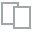
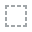
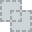
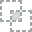
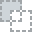
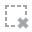
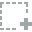
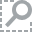
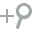
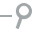
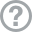
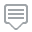
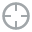
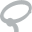
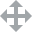
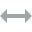
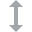
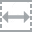
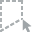
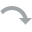
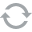
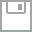
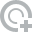
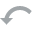
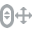
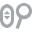
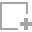
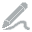
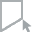
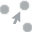
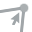
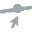

In [ ]:
report = create_report(data)
report
display(report)
#report.save('reporte_ML') 
#report.show_browser() 

##**Descripción de Variables**

1- userId: número de usario

2- score : calificación de la película

3- timestamp: fecha decalificación

4- id : de la película por plataforma

5- show_id: id de la pelicula

6- platform: plataforma

7- type: tipo de contenido

8- title: nombre de la película

9- director: nombre  del director

10- cast: elenco de actores

11- country: país de origen de la pelicual

12- date_added: fecha de subida la película

13- year: fecha de lanzamiento

14- rating: clasificación 

15- duration: duración de la pelicula o serie

16- listed_in: tipo de genero al que corresponde

17- description: breve descripción del titulo

18- duration_int: cantidad 

19- duration_type: temporadas o minutos

20-Scored: score promedio

Nombre de columnas 

In [ ]:
data.columns

Index(['userId', 'score', 'timestamp', 'id', 'show_id', 'platform', 'type',
       'title', 'director', 'cast', 'country', 'date_added', 'year', 'rating',
       'duration', 'listed_in', 'description', 'duration_int', 'duration_type',
       'Scored'],
      dtype='object')

Muestra del contenido del dataset

In [ ]:
data.sample(5)

userId  score  timestamp      id show_id platform     type  \
8311477   27203    4.5 2016-04-09  as1811   s1811   amazon  tv show   
2343754  121105    4.0 1999-12-06  hs2440   s2440     hulu  tv show   
4892815  253996    4.5 2014-10-02  as8971   s8971   amazon    movie   
4445508   24432    3.0 2000-03-26  ns5052   s5052  netflix    movie   
2124186  259000    3.0 2008-09-05  hs1549   s1549     hulu  tv show   

                                      title          director  \
8311477                          lost in oz              None   
2343754                       rosa diamante              None   
4892815                         blood crime  william a graham   
4445508                            the bros   you-jeong chang   
2124186  chris farley: anything for a laugh              None   

                                                      cast  \
8311477  ashley boettcher, alexander polinsky, grey gri...   
2343754                                               None   
4892815    james caan, johnathon schaech, elizabeth lackey   
4445508  dong-hwi lee, dong-seok ma, ha-nui lee, woo-ji...   
2124186                                               None   

                                       country date_added  year rating  \
8311477  united kingdom, canada, united states        NaT  2018    all   
2343754                  united states, mexico 2018-08-10  2012  tv-14   
4892815                                   None        NaT  2002      r   
4445508                            south korea 2018-02-02  2017  tv-14   
2124186                                   None 2020-07-01  2019  tv-14   

          duration                               listed_in  \
8311477  2 seasons                                    kids   
2343754   1 season                           drama, latino   
4892815     88 min                         drama, suspense   
4445508    102 min  comedies, dramas, international movies   
2124186   1 season                     documentaries, news   

                                               description  duration_int  \
8311477  13 new episodes of the multi-emmy award-winnin...             2   
2343754  rosa diamante relata la historia de rosa (carl...             1   
4892815  a thriller about a cop who flees the big city ...            88   
4445508  reunited in their hometown for their father's ...           102   
2124186  in his all-too-brief career, chris farley conn...             1   

        duration_type  Scored  
8311477        season    3.46  
2343754        season    3.52  
4892815           min    3.53  
4445508           min    3.58  
2124186        season    3.49

Ralizamos una correlación entre las variables cuantitativas

In [ ]:
data.corr()

userId     score      year  duration_int    Scored
userId        1.000000  0.004373 -0.000694      0.000169  0.000536
score         0.004373  1.000000  0.001027     -0.000110  0.046158
year         -0.000694  0.001027  1.000000     -0.131727  0.011642
duration_int  0.000169 -0.000110 -0.131727      1.000000 -0.006225
Scored        0.000536  0.046158  0.011642     -0.006225  1.000000

Renombramos la columna 'type' por 'tipo' ya que existe un parametro type dentro del entorno y no queremos tener problemas con eso

In [ ]:
data = data.rename(columns={'type': 'tipo'})

In [ ]:
data.head(5)

userId  score  timestamp      id show_id platform     tipo  \
156022    58949    3.0 1996-07-31   hs817    s817     hulu  tv show   
8508543   50606    5.0 2002-10-18  as5221   s5221   amazon    movie   
6080052   42961    0.5 2005-04-02  as4499   s4499   amazon    movie   
1421583  117518    3.5 2017-07-12  hs1020   s1020     hulu    movie   
4500333  251978    5.0 2002-04-30  as6557   s6557   amazon  tv show   

                                  title         director  \
156022                       hysterical             None   
8508543              take me to tarzana  maceo greenberg   
6080052                          raabta     dinesh vijan   
1421583  terra willy: unexplored planet             None   
4500333                      la familia             None   

                                                      cast country date_added  \
156022                                                None    None 2021-04-03   
8508543  andrew creer, samantha robinson, jonathan benn...    None        NaT   
6080052  kriti sanon, sushant singh rajput, deepika pad...   india        NaT   
1421583                                               None  france 2021-01-22   
4500333  pau gasol, marc gasol, jorge garbajosa, juan c...    None        NaT   

         year rating  duration                      listed_in  \
156022   2021  tv-ma  1 season          comedy, documentaries   
8508543  2021    18+   107 min                         comedy   
6080052  2017    13+   144 min  drama, international, romance   
1421583  2019     pg    90 min        adventure, comedy, kids   
4500333  2021   tv-g  1 season                         sports   

                                               description  duration_int  \
156022   stand-up comedy had always been a male domain....             1   
8508543  after learning their company has been illicitl...           107   
6080052  a woman crosses paths with her reincarnated lo...           144   
1421583  when a young boy crash lands on an unexplored ...            90   
4500333  "from the foundation of the group during their...             1   

        duration_type  Scored  
156022         season    3.46  
8508543           min    3.54  
6080052           min    3.53  
1421583           min    3.52  
4500333        season    3.51

Crearemos una columna 'Id_numerico' con la columna 'id' para que el id de las peliculas sea solo númerico

Para hacer lo anterior definimos una función para agregar el prefijo según el tipo de letra

y por ultimo aplicamos la funcion para agregar el prefijo númerico creado

In [ ]:
prefijos = {'ns': '04', 'as': '01', 'hs': '03', 'ds': '02'}

def agregar_prefijo(x):
    match = re.search('([a-z]{2})(\d+)', x)
    if match:
        tipo_letra = match.group(1)
        num = match.group(2)
        prefijo = prefijos.get(tipo_letra, '')
        return prefijo + num
    else:
        return x


data['id_numerico'] = data['id'].apply(agregar_prefijo)

Movemos la nueva columna 'id_numerico' junto con la columna 'id'

In [ ]:
id_numerico = data.pop('id_numerico')
data.insert(2, 'id_numerico',id_numerico)

In [ ]:
data['id_numerico'] = data['id_numerico'].astype(int)

In [ ]:
data.head(5)

userId  score  id_numerico  timestamp      id show_id platform  \
156022    58949    3.0         3817 1996-07-31   hs817    s817     hulu   
8508543   50606    5.0        15221 2002-10-18  as5221   s5221   amazon   
6080052   42961    0.5        14499 2005-04-02  as4499   s4499   amazon   
1421583  117518    3.5        31020 2017-07-12  hs1020   s1020     hulu   
4500333  251978    5.0        16557 2002-04-30  as6557   s6557   amazon   

            tipo                           title         director  ...  \
156022   tv show                      hysterical             None  ...   
8508543    movie              take me to tarzana  maceo greenberg  ...   
6080052    movie                          raabta     dinesh vijan  ...   
1421583    movie  terra willy: unexplored planet             None  ...   
4500333  tv show                      la familia             None  ...   

        country date_added  year  rating  duration  \
156022     None 2021-04-03  2021   tv-ma  1 season   
8508543    None        NaT  2021     18+   107 min   
6080052   india        NaT  2017     13+   144 min   
1421583  france 2021-01-22  2019      pg    90 min   
4500333    None        NaT  2021    tv-g  1 season   

                             listed_in  \
156022           comedy, documentaries   
8508543                         comedy   
6080052  drama, international, romance   
1421583        adventure, comedy, kids   
4500333                         sports   

                                               description duration_int  \
156022   stand-up comedy had always been a male domain....            1   
8508543  after learning their company has been illicitl...          107   
6080052  a woman crosses paths with her reincarnated lo...          144   
1421583  when a young boy crash lands on an unexplored ...           90   
4500333  "from the foundation of the group during their...            1   

         duration_type Scored  
156022          season   3.46  
8508543            min   3.54  
6080052            min   3.53  
1421583            min   3.52  
4500333         season   3.51  

[5 rows x 21 columns]

Revisamos la correlación de el 'id' de cada pelicula con su respectivo nombre 

In [ ]:
id = 'ns6745'
nombre_pelicula = data.loc[data['id'] == id, 'title'].iloc[0]
print(nombre_pelicula)


fear files... har mod pe darr


Generamos un conteo de usuarios únicos

In [ ]:
print(len(data['userId'].unique()))

113224


Hacemos un conteo para ver la distribución de los datos 

In [ ]:
conteo = data['userId'].value_counts()
conteo_acumulativo = conteo.cumsum()
porcentaje_acumulativo = conteo_acumulativo / len(data)
pareto_df = pd.DataFrame({'userId': conteo.index, 'conteo': conteo, 'porcentaje_acumulativo': porcentaje_acumulativo})
pareto_df = pareto_df.sort_values(by='porcentaje_acumulativo', ascending=False)
porcentaje_total = 100 *conteo_acumulativo  / len(data)
pareto_df['total_percent'] = total_percent
print(pareto_df)

        userId  conteo  porcentaje_acumulativo  total_percent
34098    34098       1                1.000000     100.000000
254845  254845       1                1.000000      99.999982
394        394       1                1.000000      99.999964
258156  258156       1                0.999999      99.999946
5493      5493       1                0.999999      99.999927
...        ...     ...                     ...            ...
24025    24025    2461                0.004129       0.412925
70648    70648    2670                0.003683       0.368278
270123  270123    3754                0.003198       0.319839
8659      8659    4672                0.002517       0.251735
45811    45811    9204                0.001670       0.166977

[113224 rows x 4 columns]


In [ ]:
filtered_df = pareto_df[pareto_df['cumulative_percent'] <= 0.80]
unique_values = len(filtered_df)
print(unique_values)

30406


In [ ]:
for percent in range(70, 81):
    percent /= 100
    filtered_df = pareto_df[pareto_df['cumulative_percent'] <= percent]
    unique_values = len(filtered_df)
    percent_of_unique = 100 * unique_values / len(pareto_df['userId'].unique())
    print(f"Con {percent*100}% del porcentaje acumulado de 'userId', se tienen {unique_values} valores únicos que representan el {percent_of_unique:.2f}% de todos los valores únicos.")


Con 70.0% del porcentaje acumulado de 'userId', se tienen 20212 valores únicos que representan el 17.85% de todos los valores únicos.
Con 71.0% del porcentaje acumulado de 'userId', se tienen 21038 valores únicos que representan el 18.58% de todos los valores únicos.
Con 72.0% del porcentaje acumulado de 'userId', se tienen 21902 valores únicos que representan el 19.34% de todos los valores únicos.
Con 73.0% del porcentaje acumulado de 'userId', se tienen 22805 valores únicos que representan el 20.14% de todos los valores únicos.
Con 74.0% del porcentaje acumulado de 'userId', se tienen 23747 valores únicos que representan el 20.97% de todos los valores únicos.
Con 75.0% del porcentaje acumulado de 'userId', se tienen 24731 valores únicos que representan el 21.84% de todos los valores únicos.
Con 76.0% del porcentaje acumulado de 'userId', se tienen 25759 valores únicos que representan el 22.75% de todos los valores únicos.
Con 77.0% del porcentaje acumulado de 'userId', se tienen 2683

In [ ]:
data.score.describe()

count    5.512144e+06
mean     3.533648e+00
std      1.059742e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: score, dtype: float64

Creamos una visualización de las 10  peliculas má vistas con su respectivo nombre

In [ ]:
peliculas_mas_vistas = data['id'].value_counts().sort_values(ascending=False).head(10)
titulos_mas_vistos = data['title'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
for pelicula, titulo in zip(peliculas_mas_vistas.index, titulos_mas_vistos.index):
    print(f"Película {pelicula} ({titulo}) ha sido vista {peliculas_mas_vistas[pelicula]} veces.")

Película as1254 (married at first sight) ha sido vista 302 veces.
Película ns6848 (yu-gi-oh! arc-v) ha sido vista 299 veces.
Película as800 (national treasure) ha sido vista 298 veces.
Película as3651 (sister, sister) ha sido vista 298 veces.
Película ns2791 (ancient aliens) ha sido vista 297 veces.
Película hs1463 (moesha) ha sido vista 297 veces.
Película as7221 (paradox) ha sido vista 297 veces.
Película ns6697 (supermarket sweep) ha sido vista 296 veces.
Película as9469 (star trek: voyager) ha sido vista 295 veces.
Película as3218 (survivor) ha sido vista 294 veces.


Creamos el gráfico para tener un inside más visual

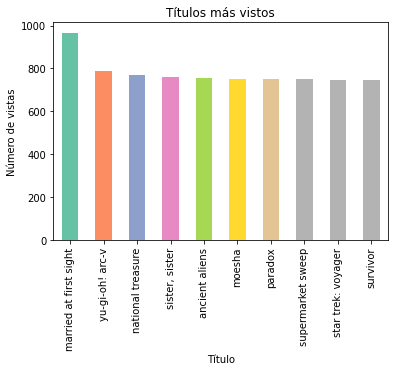

In [ ]:
n = len(titulos_mas_vistos)
colores = plt.cm.Set2(range(n))

ax = titulos_mas_vistos.plot.bar(color=colores)

ax.set_xlabel('Título')
ax.set_ylabel('Número de vistas')
ax.set_title('Títulos más vistos')
plt.show()

Creamos un grafico de las 10 peliculas con mejor score

In [ ]:
movie_scores = data.groupby('title')['score'].mean().reset_index()
sorted_movies = movie_scores.sort_values(by='score', ascending=False)
top_10_movies = sorted_movies.head(10)
print("Las 10 primeras películas clasificadas de mayor a menor por score son:")
for index, row in top_10_movies.iterrows():
    print(f"{row['title']}: {row['score']}")

Las 10 primeras películas clasificadas de mayor a menor por score son:
eddie izzard: force majeure: 3.811926605504587
shadaa: 3.7983539094650207
transmigrate (the troubled one): 3.7865612648221343
the muppets (series): 3.7780269058295963
37-teen: 3.7679324894514767
the first time: 3.7641129032258065
espn fc: 3.7595744680851064
thalaivii (telugu): 3.7589285714285716
ouija japan: 3.7588235294117647
the good detective: 3.7581395348837208


Creamos el gráfico del filtro anterior

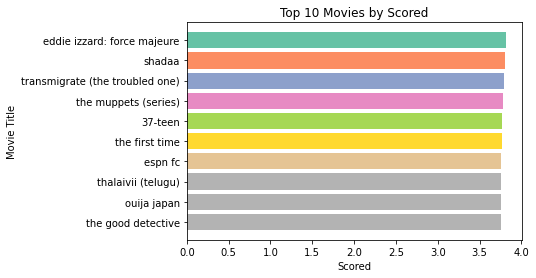

In [ ]:
colores = plt.cm.Set2(range(n))
plt.barh(top_10_movies['title'], top_10_movies['score'], color=colores)
plt.gca().invert_yaxis()  # Invert the y-axis to show highest score at the top
plt.xlabel('Scored')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Scored')

plt.show()  # Display the plot

In [ ]:
calificaciones_por_usuario = data.groupby('userId')['Scored'].mean().sort_values(ascending=False)[:20]


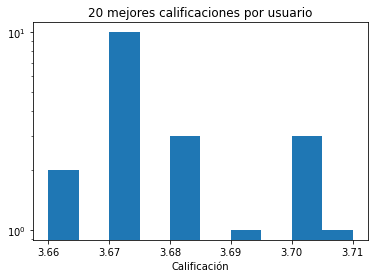

In [ ]:
plt.hist(calificaciones_por_usuario, log= True)
plt.title('20 mejores calificaciones por usuario')
plt.xlabel('Calificación')
plt.show()

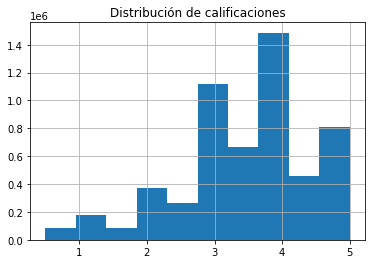

In [ ]:
data['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

Valores dentro de tipo corresponde al tipo de programa

In [ ]:
valores_unicos = data["tipo"].unique()
print(valores_unicos)

['tv show' 'movie']


Crearemos una grafica para ver la distribución

In [ ]:
tabla_valores_unicos = data["tipo"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(data) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

     valor  cantidad porcentaje
0    movie   3949007     71.64%
1  tv show   1563137     28.36%


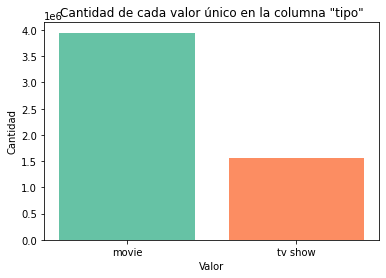

In [ ]:
plt.bar(tabla_valores_unicos['valor'], tabla_valores_unicos['cantidad'],color=colores)
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada valor único en la columna "tipo"')
plt.show()

In [ ]:
unique_values = data['title'].nunique()
print("La columna 'title' tiene", unique_values, "valores únicos.")

La columna 'title' tiene 22042 valores únicos.


Revisamos la clasificación de peliculas por paí en porcentaje

In [ ]:
valores_unicos = data["country"].unique()
tabla_valores_unicos = data["country"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(data) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

                                                 valor  cantidad porcentaje
0                                        united states   1197743     21.73%
1                                                india    289088      5.24%
2                                       united kingdom    139479      2.53%
3                                                japan    123393      2.24%
4                                               canada     56727      1.03%
..                                                 ...       ...        ...
881            united states, germany, bulgaria, china       203       0.0%
882               taiwan, china, france, united states       199       0.0%
883  denmark, united kingdom, south africa, sweden,...       197       0.0%
884                                           bulgaria       190       0.0%
885              netherlands, belgium, germany, jordan       189       0.0%

[886 rows x 3 columns]


Despues de revisado todos los valores, utilizaremos las columas 'userId', 'id_numerico','score'

In [ ]:
data_ml= data.loc[:, ['userId', 'id_numerico', 'score']]

In [ ]:
data_ml.head(5)

userId  id_numerico  score
156022    58949         3817    3.0
8508543   50606        15221    5.0
6080052   42961        14499    0.5
1421583  117518        31020    3.5
4500333  251978        16557    5.0

In [ ]:
data_ml.shape

(5512144, 3)

In [ ]:
data_ml.to_parquet('data_ml.parquet')